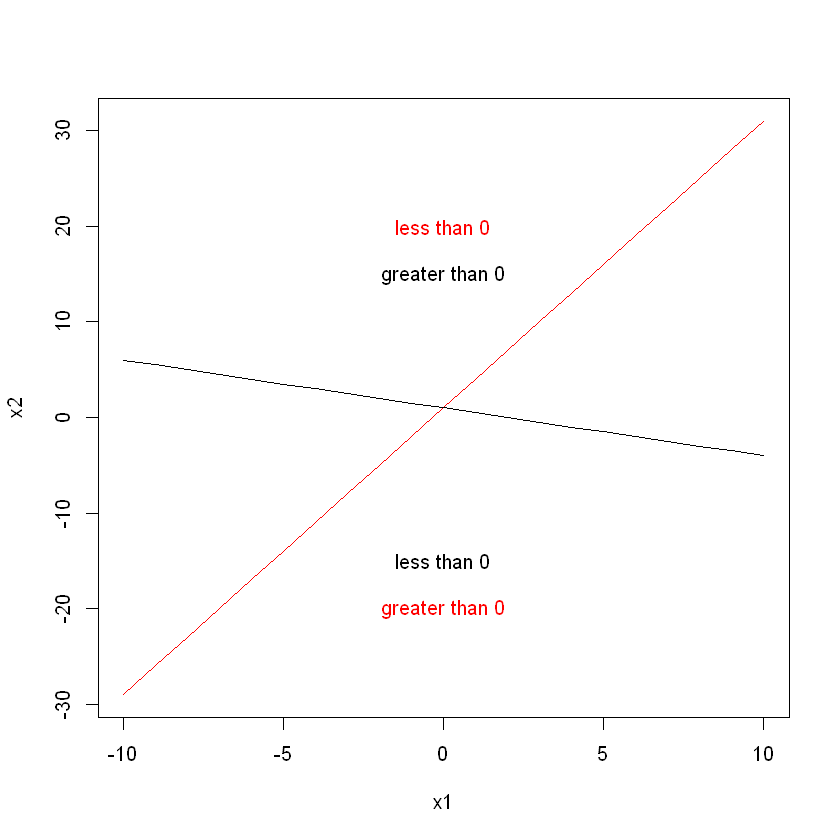

In [1]:
#Question 1

x1 = -10:10
x2 = 1 + 3 * x1
plot(x1, x2, type = "l", col = "red")
text(c(0), c(-20), "greater than 0", col = "red")
text(c(0), c(20), "less than 0", col = "red")
lines(x1, 1 - x1/2)
text(c(0), c(-15), "less than 0")
text(c(0), c(15), "greater than 0")

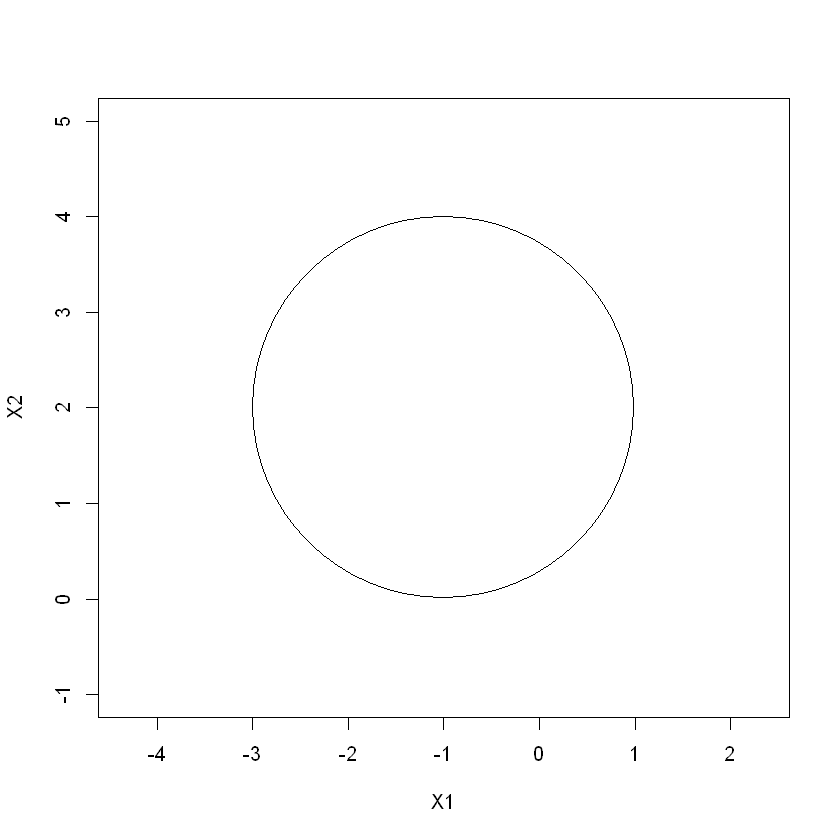

In [2]:
#Question 2 a

radius = 2
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", 
    ylab = "X2")
symbols(c(-1), c(2), circles = c(radius), add = TRUE, inches = FALSE)

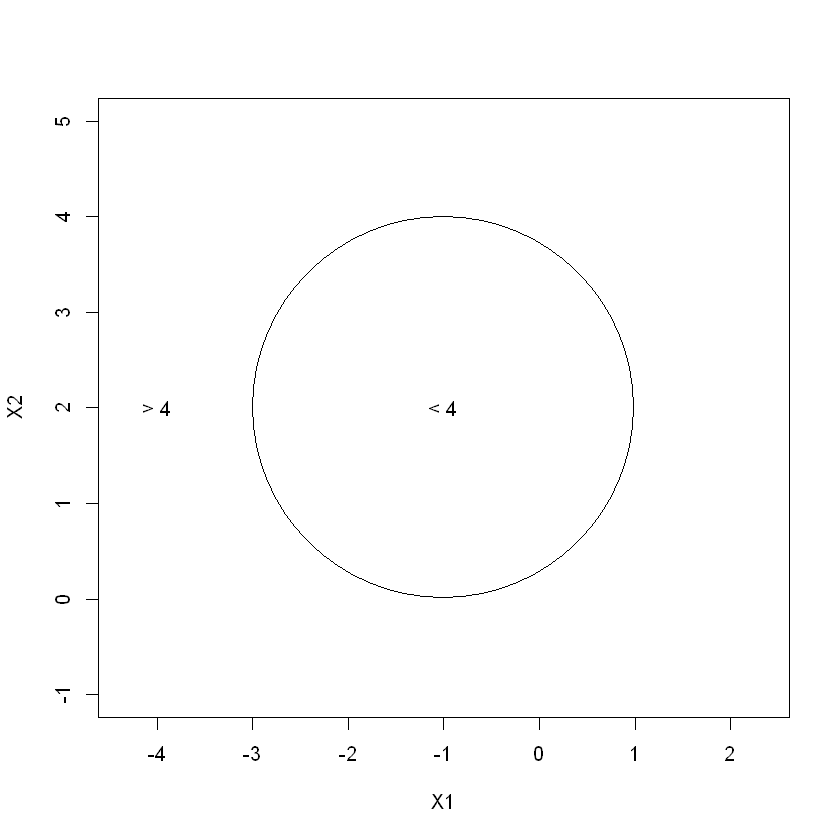

In [3]:
# Question 2 B

radius = 2
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", 
    ylab = "X2")
symbols(c(-1), c(2), circles = c(radius), add = TRUE, inches = FALSE)
text(c(-1), c(2), "< 4")
text(c(-4), c(2), "> 4")

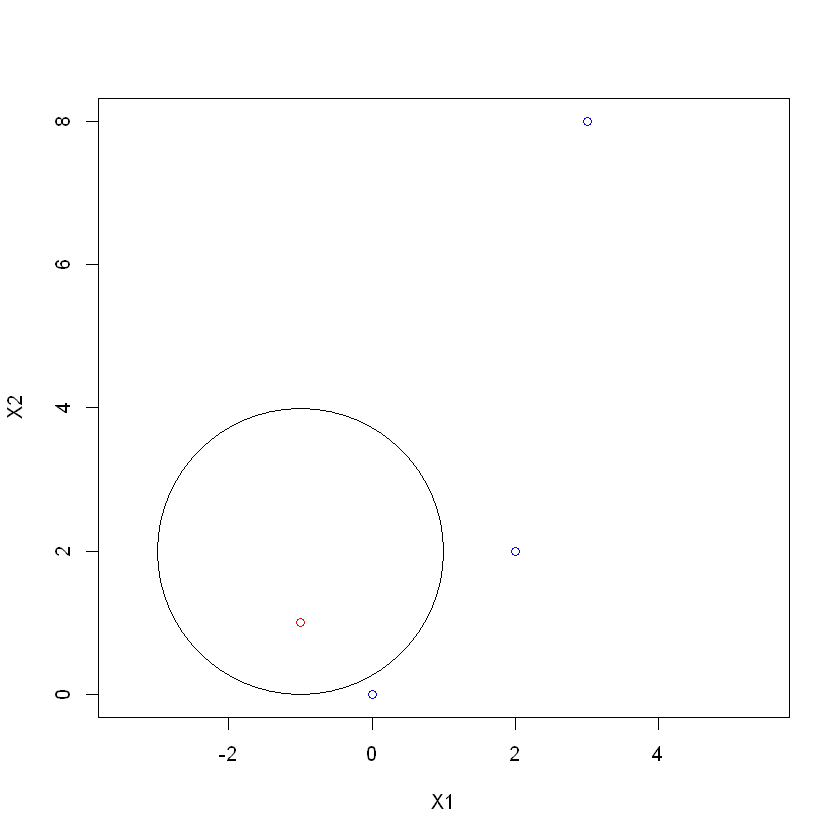

In [4]:
#Question 2 C

radius = 2
plot(c(0, -1, 2, 3), c(0, 1, 2, 8), col = c("blue", "red", "blue", "blue"), 
    type = "p", asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(radius), add = TRUE, inches = FALSE)


In [ ]:
#Question 2 D

(1+X1)2+(2−X2)2>41+2X1+X21+4−4X2+X22>45+2X1−4X2+X21+X22>4

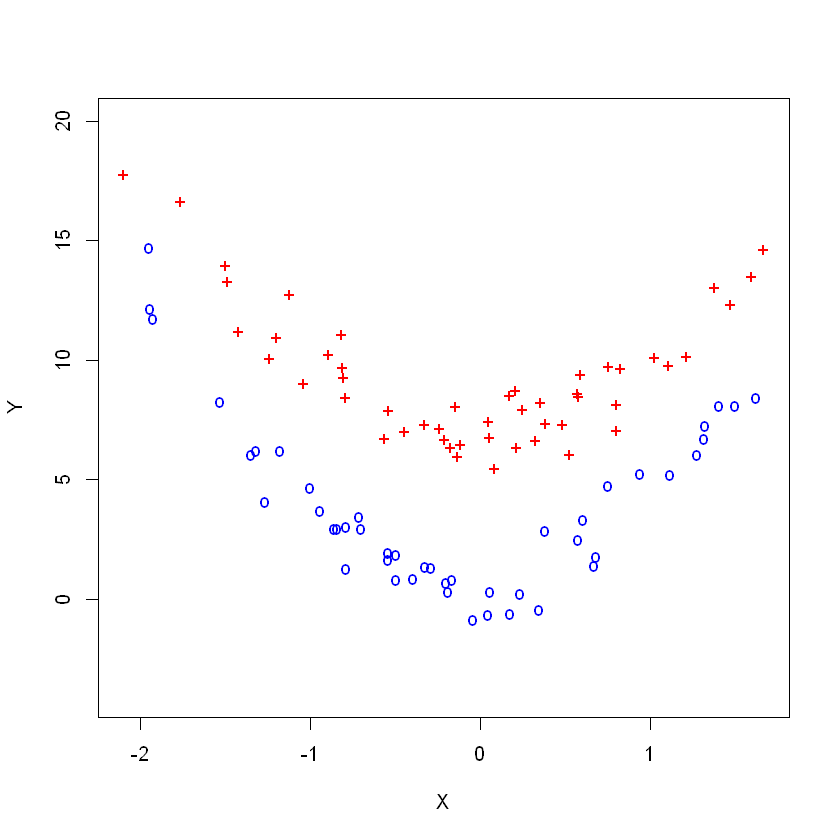

In [5]:
#Question 4

set.seed(131)
x = rnorm(100)
y = 3 * x^2 + 4 + rnorm(100)
train = sample(100, 50)
y[train] = y[train] + 3
y[-train] = y[-train] - 3
# Plot using different colors
plot(x[train], y[train], pch="+", lwd=4, col="red", ylim=c(-4, 20), xlab="X", ylab="Y")
points(x[-train], y[-train], pch="o", lwd=4, col="blue")

In [6]:
set.seed(315)
z = rep(0, 100)
z[train] = 1
# Take 25 observations each from train and -train
final.train = c(sample(train, 25), sample(setdiff(1:100, train), 25))
data.train = data.frame(x=x[final.train], y=y[final.train], z=as.factor(z[final.train]))
data.test = data.frame(x=x[-final.train], y=y[-final.train], z=as.factor(z[-final.train]))
library(e1071)

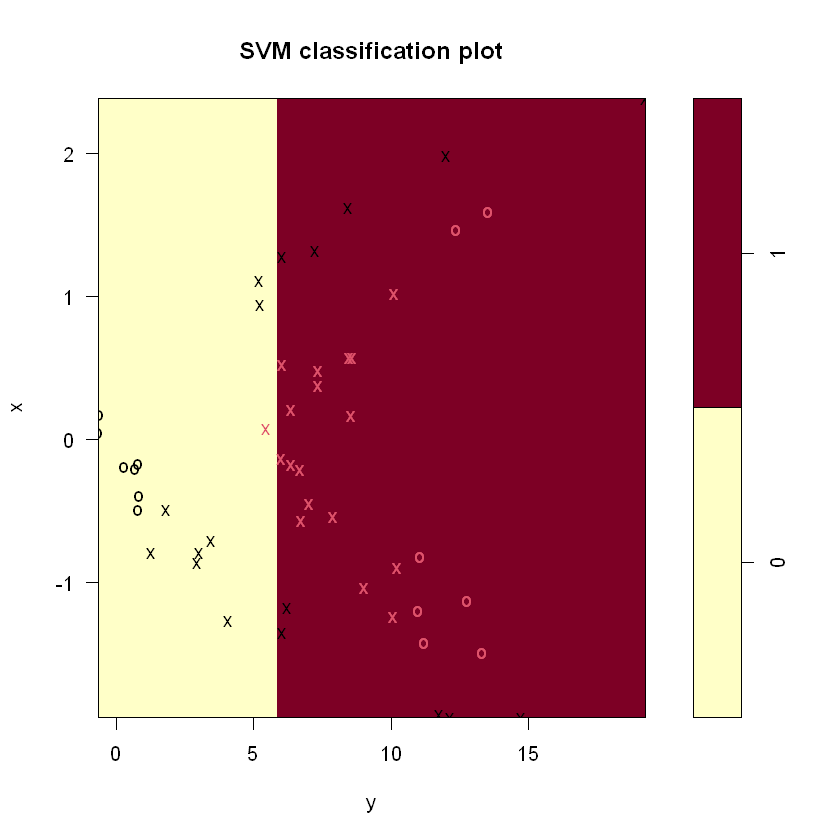

In [7]:
svm.linear = svm(z~., data=data.train, kernel="linear", cost=10)
plot(svm.linear, data.train)

In [8]:
table(z[final.train], predict(svm.linear, data.train))

   
     0  1
  0 15 10
  1  1 24

In [13]:
table(z[-final.train], predict(svm.linear, data.test))

   
     0  1
  0 18  7
  1  0 25

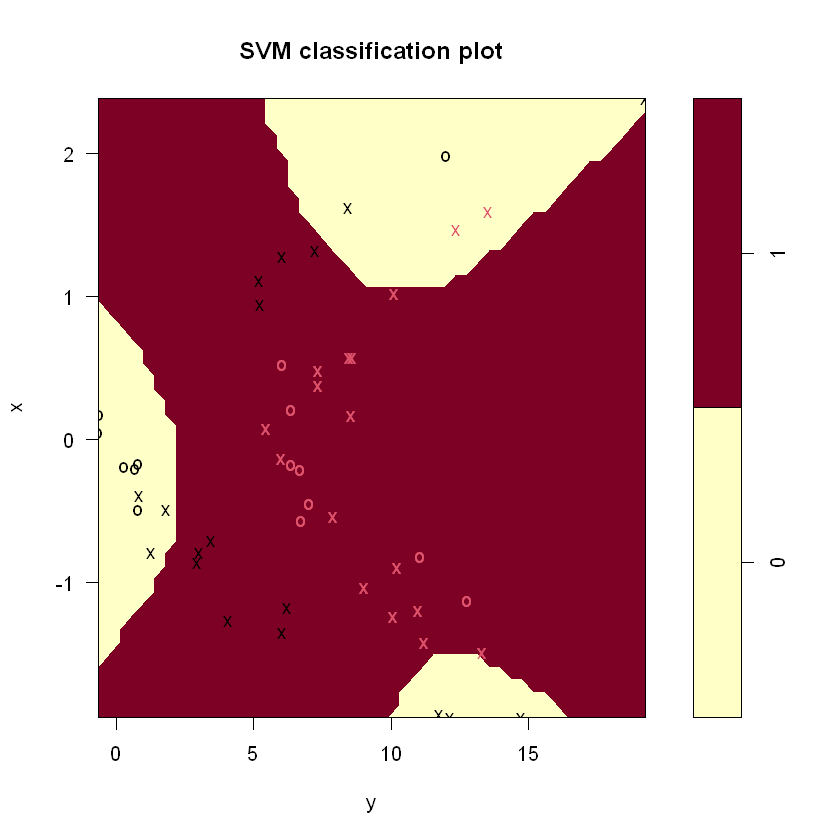

In [9]:
set.seed(32545)
svm.poly = svm(z~., data=data.train, kernel="polynomial", cost=10)
plot(svm.poly, data.train)

In [10]:
table(z[final.train], predict(svm.poly, data.train))

   
     0  1
  0 15 10
  1  2 23

In [14]:
table(z[-final.train], predict(svm.poly, data.test))

   
     0  1
  0 12 13
  1  4 21

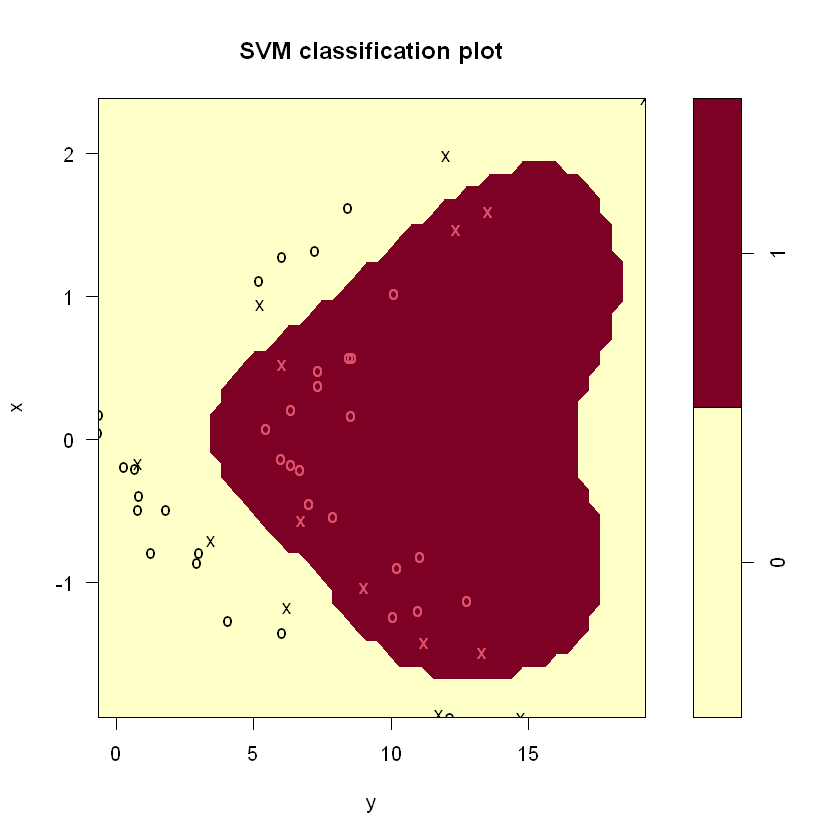

In [11]:
set.seed(996)
svm.radial = svm(z~., data=data.train, kernel="radial", gamma=1, cost=10)
plot(svm.radial, data.train)

In [12]:
table(z[final.train], predict(svm.radial, data.train))

   
     0  1
  0 25  0
  1  0 25

In [15]:
table(z[-final.train], predict(svm.radial, data.test))

   
     0  1
  0 25  0
  1  2 23

In [16]:
#Question 7 A
library(ISLR)
gas.med = median(Auto$mpg)
new.var = ifelse(Auto$mpg > gas.med, 1, 0)
Auto$mpglevel = as.factor(new.var)

In [18]:
#B
set.seed(3255)
tune.out = tune(svm, mpglevel ~ ., data = Auto, kernel = "linear", ranges = list(cost = c(0.01, 
    0.1, 1, 5, 10, 100)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.01269231 

- Detailed performance results:
   cost      error dispersion
1 1e-02 0.07397436 0.06863413
2 1e-01 0.05102564 0.06923024
3 1e+00 0.01269231 0.02154160
4 5e+00 0.01519231 0.01760469
5 1e+01 0.02025641 0.02303772
6 1e+02 0.03294872 0.02898463


In [19]:
#C
set.seed(21)
tune.out = tune(svm, mpglevel ~ ., data = Auto, kernel = "polynomial", ranges = list(cost = c(0.1, 
    1, 5, 10), degree = c(2, 3, 4)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
   10      2

- best performance: 0.5435897 

- Detailed performance results:
   cost degree     error dispersion
1   0.1      2 0.5587821 0.04538579
2   1.0      2 0.5587821 0.04538579
3   5.0      2 0.5587821 0.04538579
4  10.0      2 0.5435897 0.05611162
5   0.1      3 0.5587821 0.04538579
6   1.0      3 0.5587821 0.04538579
7   5.0      3 0.5587821 0.04538579
8  10.0      3 0.5587821 0.04538579
9   0.1      4 0.5587821 0.04538579
10  1.0      4 0.5587821 0.04538579
11  5.0      4 0.5587821 0.04538579
12 10.0      4 0.5587821 0.04538579


In [20]:
set.seed(463)
tune.out = tune(svm, mpglevel ~ ., data = Auto, kernel = "radial", ranges = list(cost = c(0.1, 
    1, 5, 10), gamma = c(0.01, 0.1, 1, 5, 10, 100)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
   10  0.01

- best performance: 0.02551282 

- Detailed performance results:
   cost gamma      error dispersion
1   0.1 1e-02 0.09429487 0.04814900
2   1.0 1e-02 0.07897436 0.03875105
3   5.0 1e-02 0.05352564 0.02532795
4  10.0 1e-02 0.02551282 0.02417610
5   0.1 1e-01 0.07891026 0.03847631
6   1.0 1e-01 0.05602564 0.02881876
7   5.0 1e-01 0.03826923 0.03252085
8  10.0 1e-01 0.03320513 0.02964746
9   0.1 1e+00 0.57660256 0.05479863
10  1.0 1e+00 0.06628205 0.02996211
11  5.0 1e+00 0.06115385 0.02733573
12 10.0 1e+00 0.06115385 0.02733573
13  0.1 5e+00 0.57660256 0.05479863
14  1.0 5e+00 0.51538462 0.06642516
15  5.0 5e+00 0.50775641 0.07152757
16 10.0 5e+00 0.50775641 0.07152757
17  0.1 1e+01 0.57660256 0.05479863
18  1.0 1e+01 0.53833333 0.05640443
19  5.0 1e+01 0.53070513 0.05708644
20 10.0 1e+01 0.53070513 0.05708644
21  0.1 1e+02 0.57660256 0.05479863
22  1.0 1e+02 0.57660256

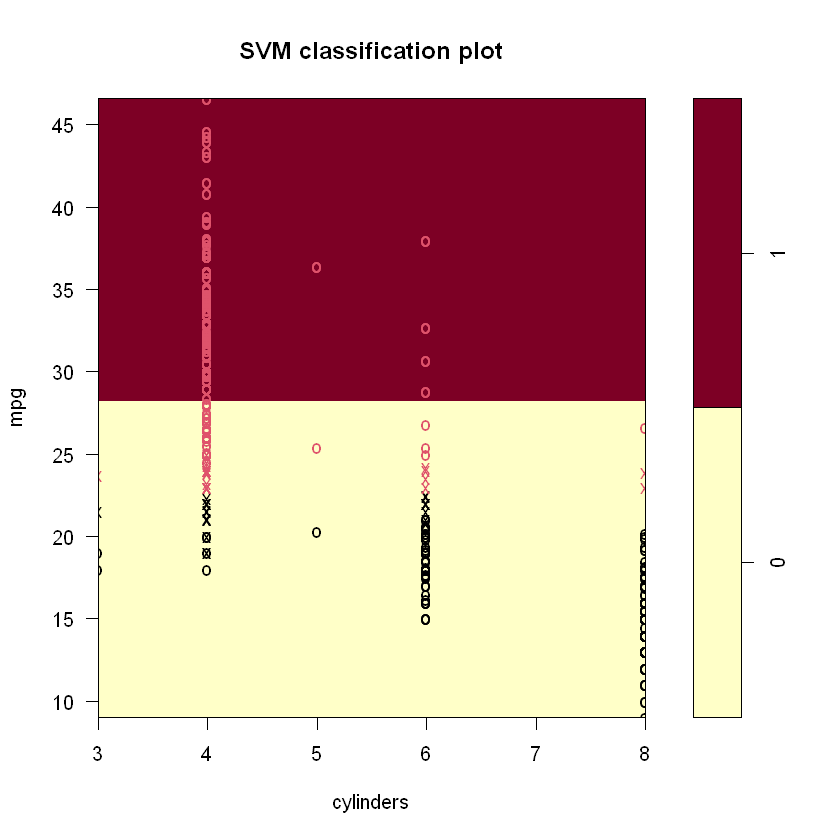

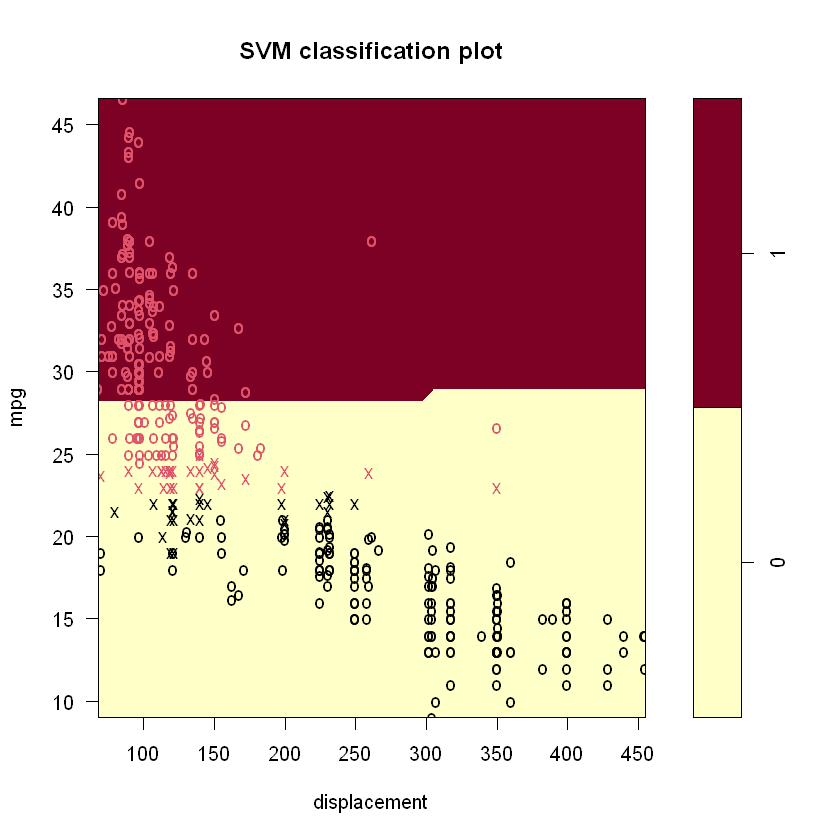

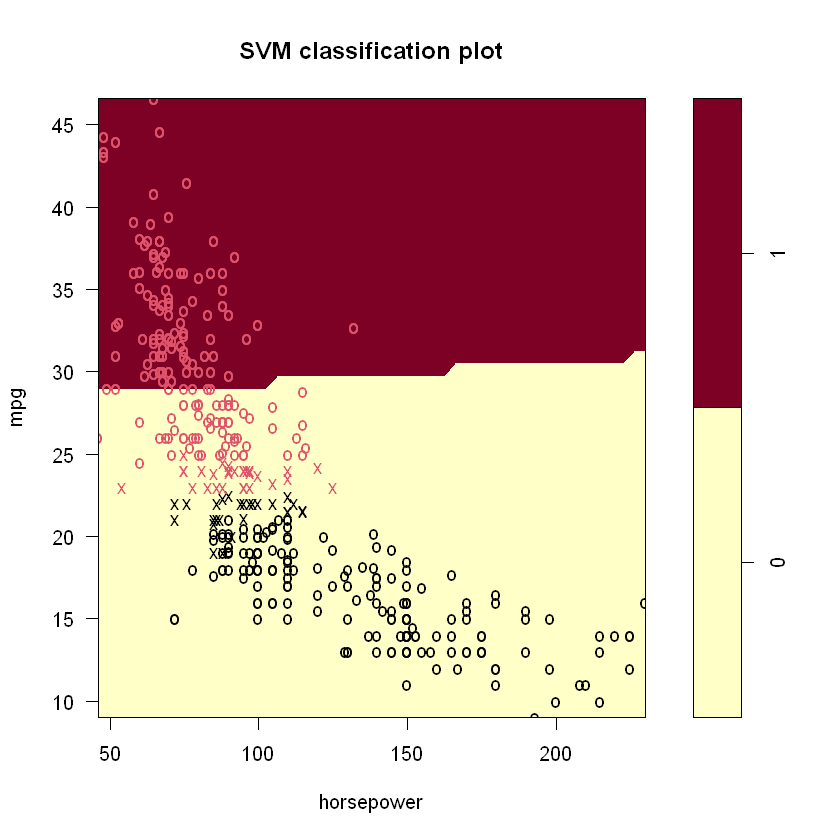

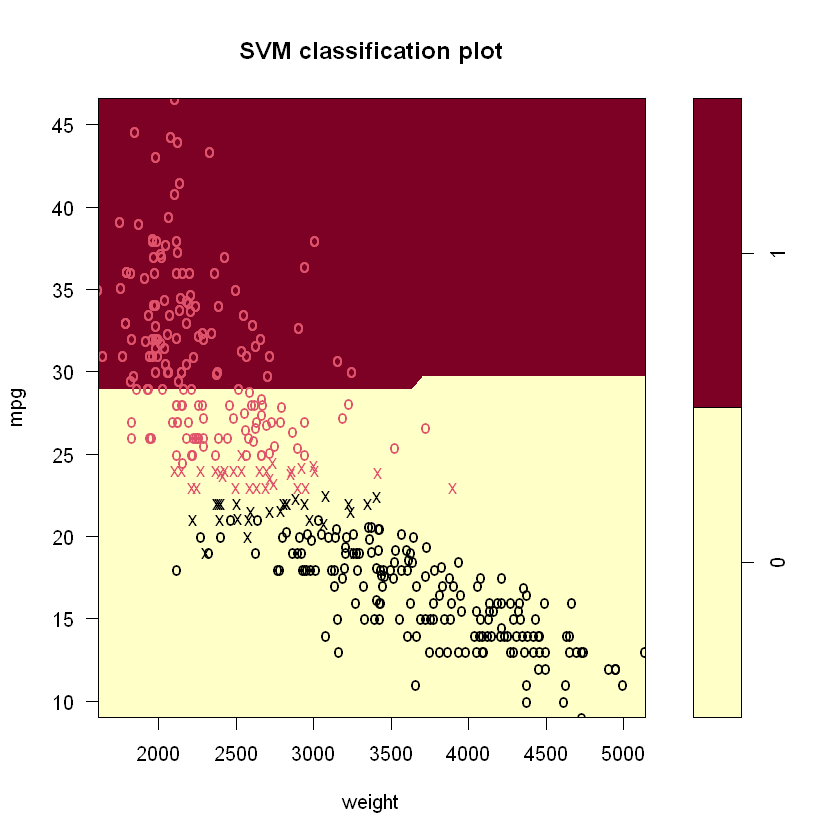

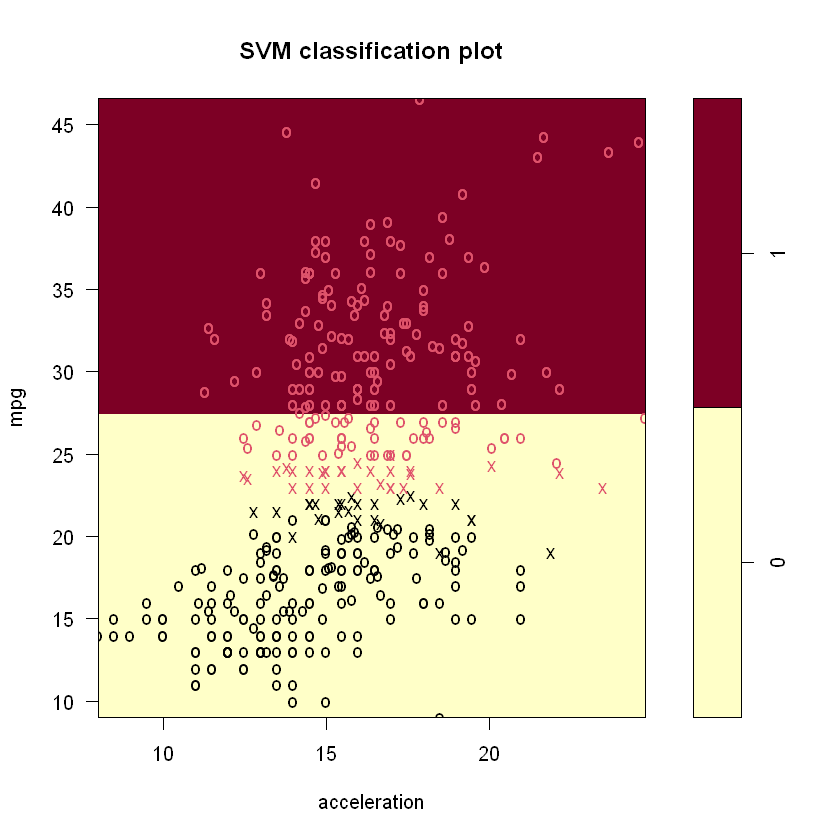

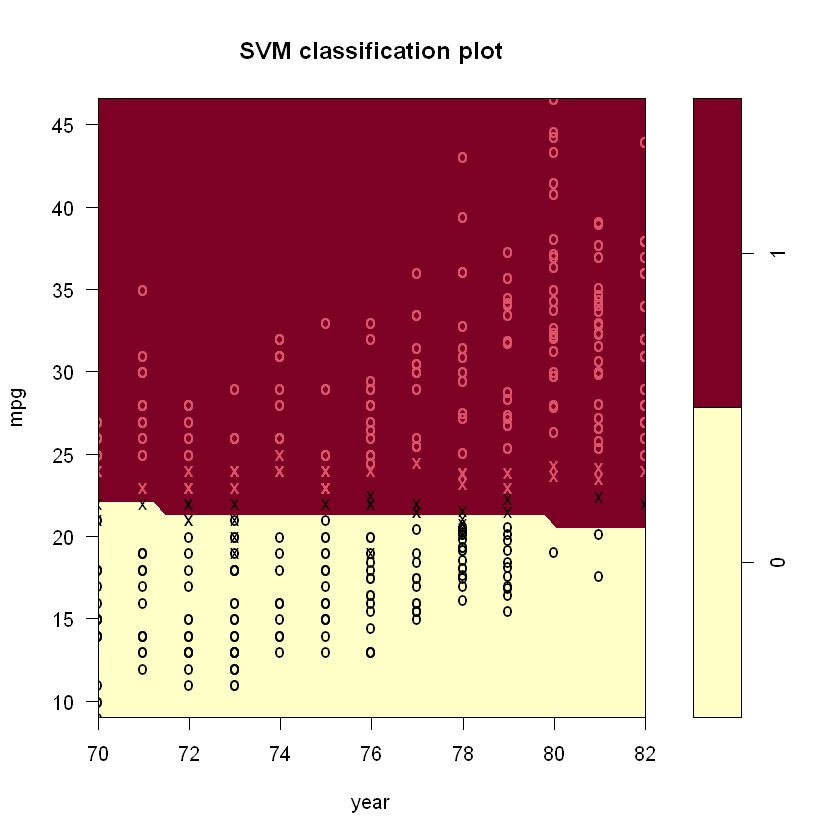

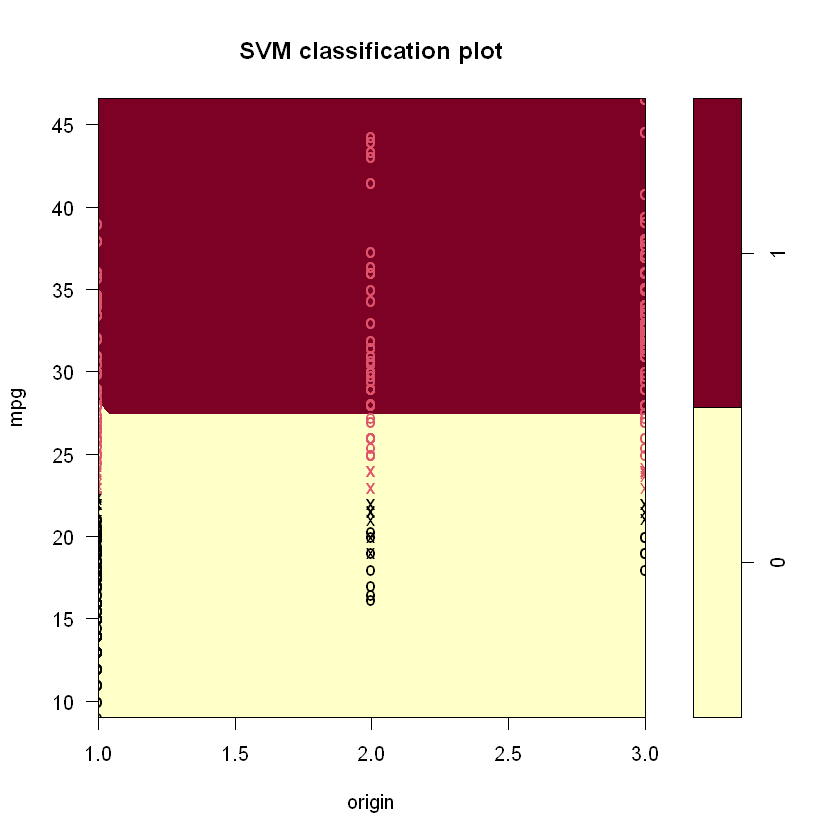

In [21]:
#D

svm.linear = svm(mpglevel ~ ., data = Auto, kernel = "linear", cost = 1)
svm.poly = svm(mpglevel ~ ., data = Auto, kernel = "polynomial", cost = 10, 
    degree = 2)
svm.radial = svm(mpglevel ~ ., data = Auto, kernel = "radial", cost = 10, gamma = 0.01)
plotpairs = function(fit) {
    for (name in names(Auto)[!(names(Auto) %in% c("mpg", "mpglevel", "name"))]) {
        plot(fit, Auto, as.formula(paste("mpg~", name, sep = "")))
    }
}
plotpairs(svm.linear)

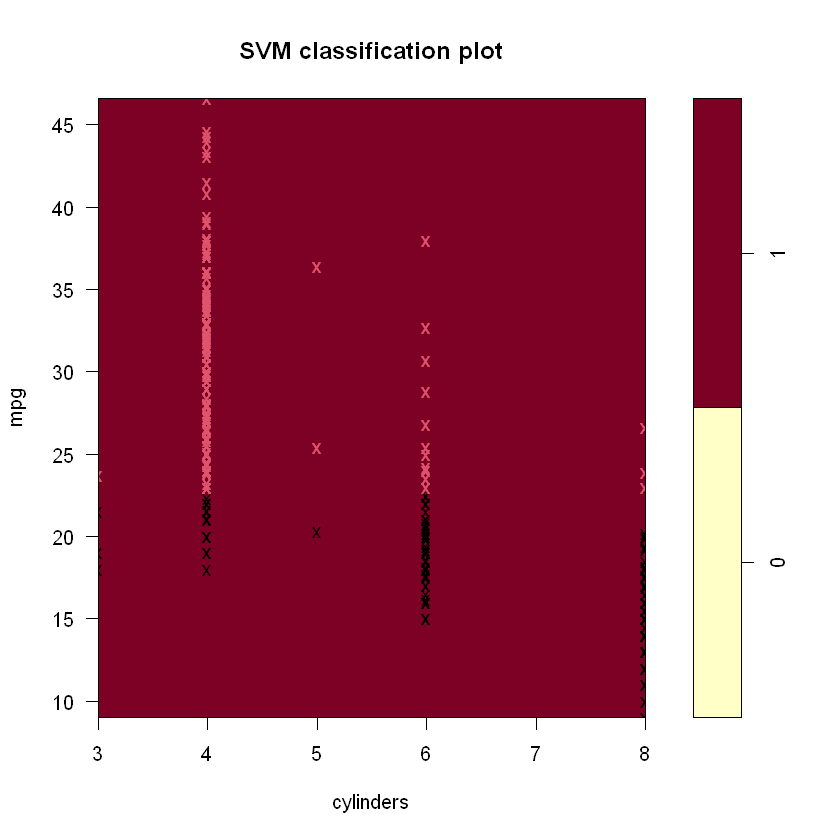

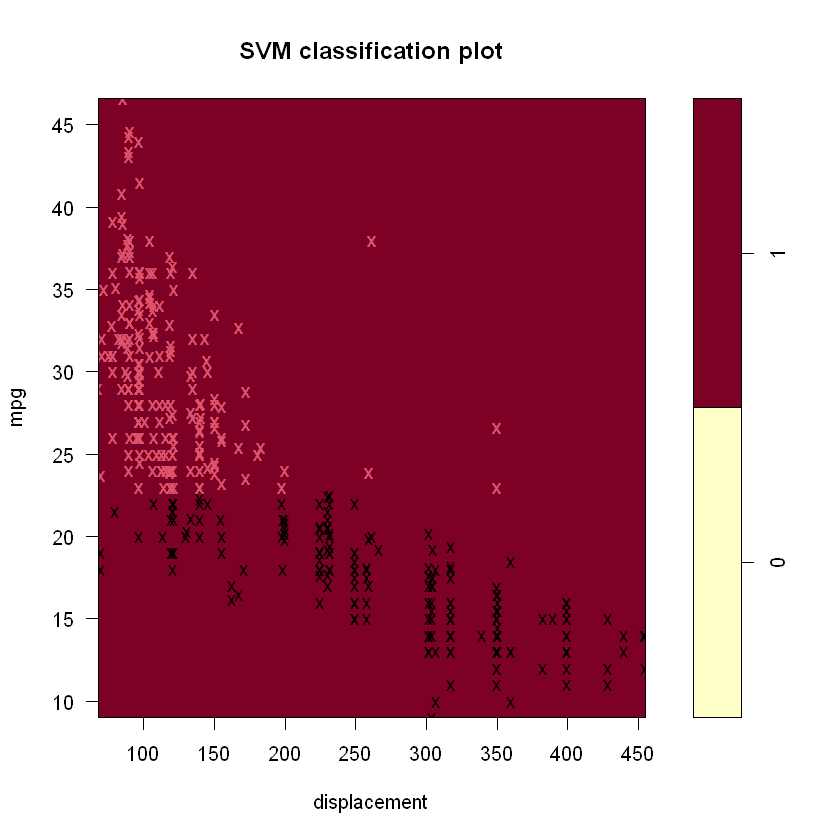

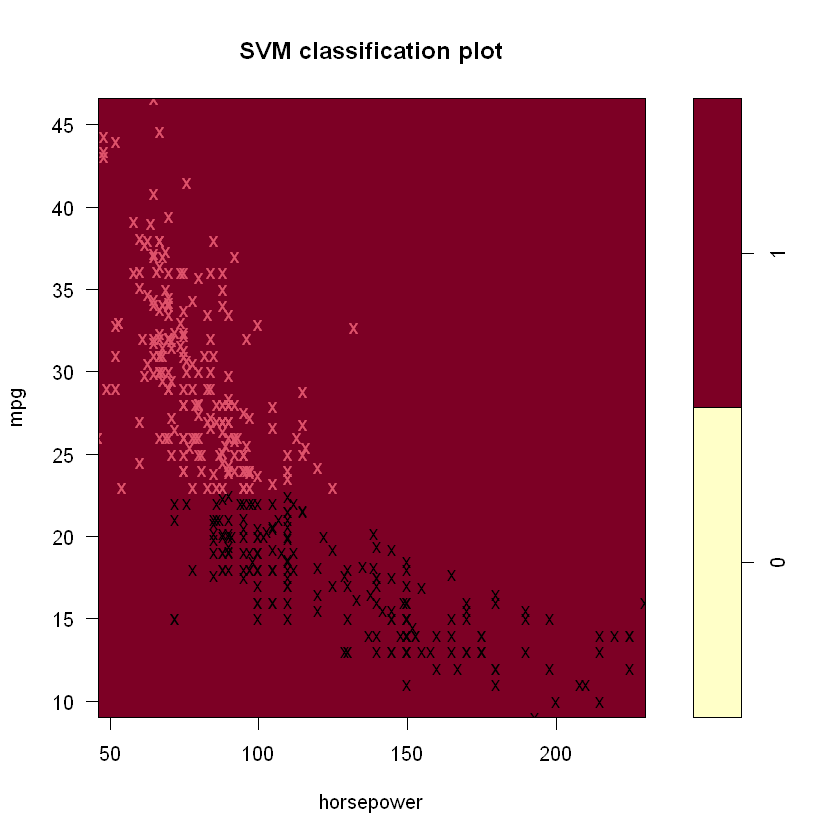

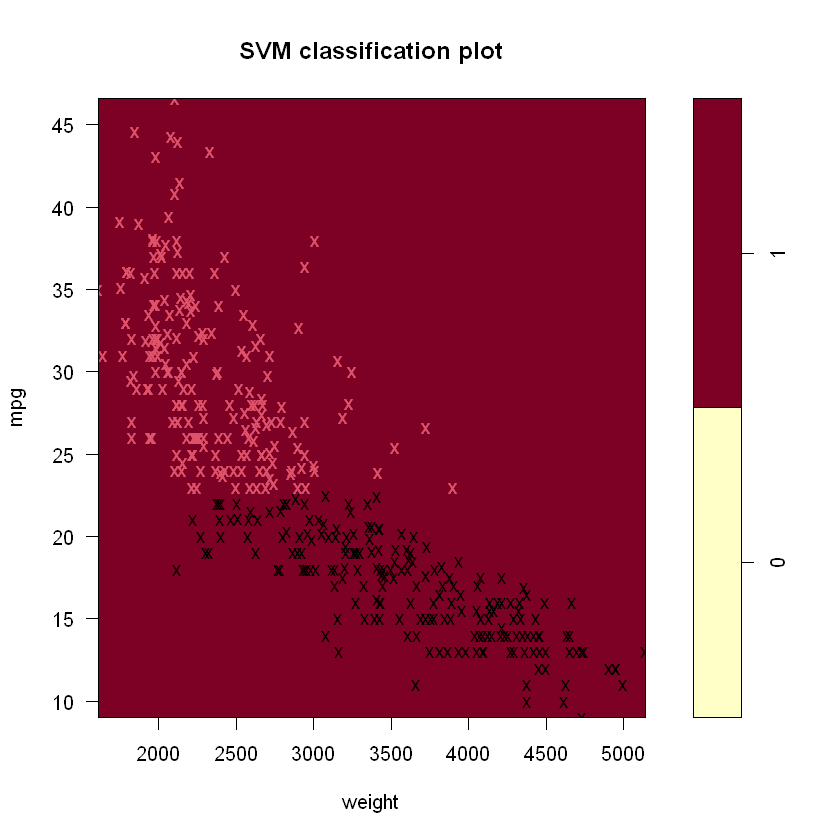

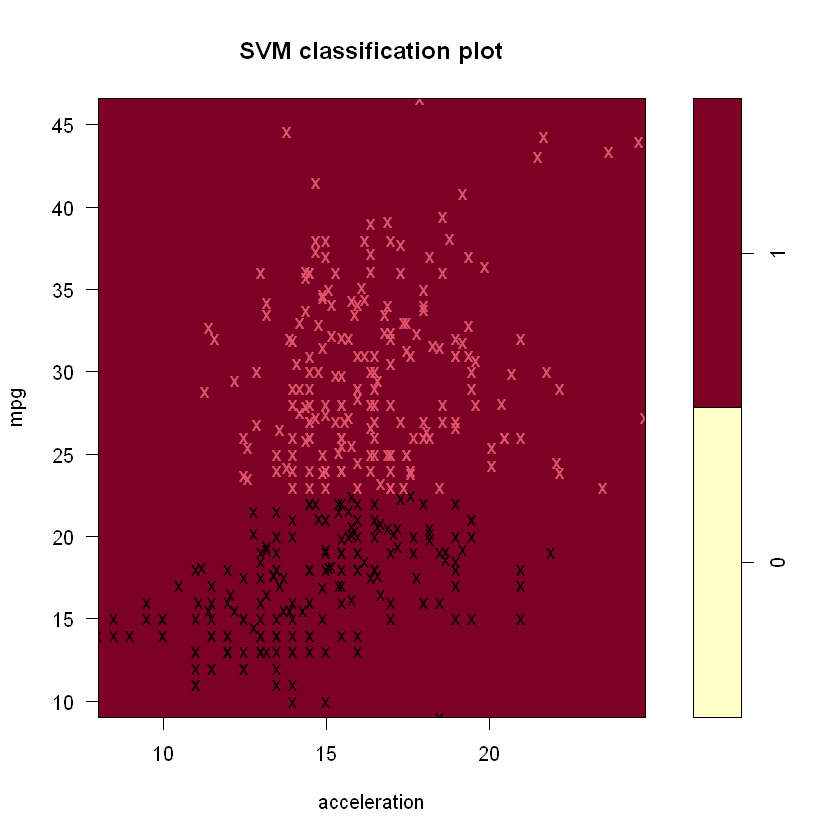

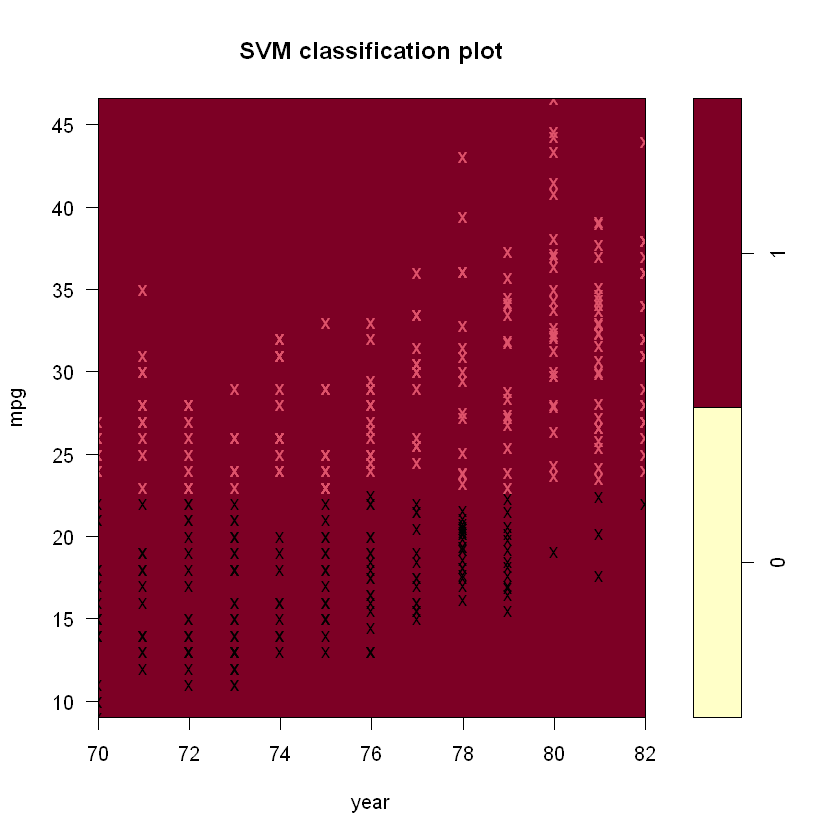

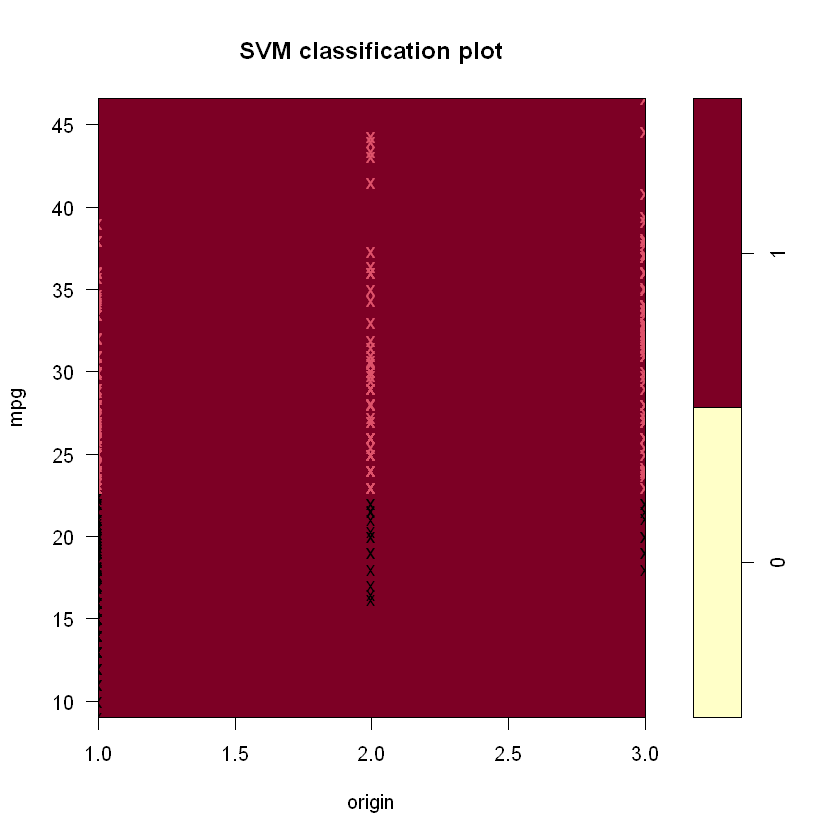

In [22]:
plotpairs(svm.poly)

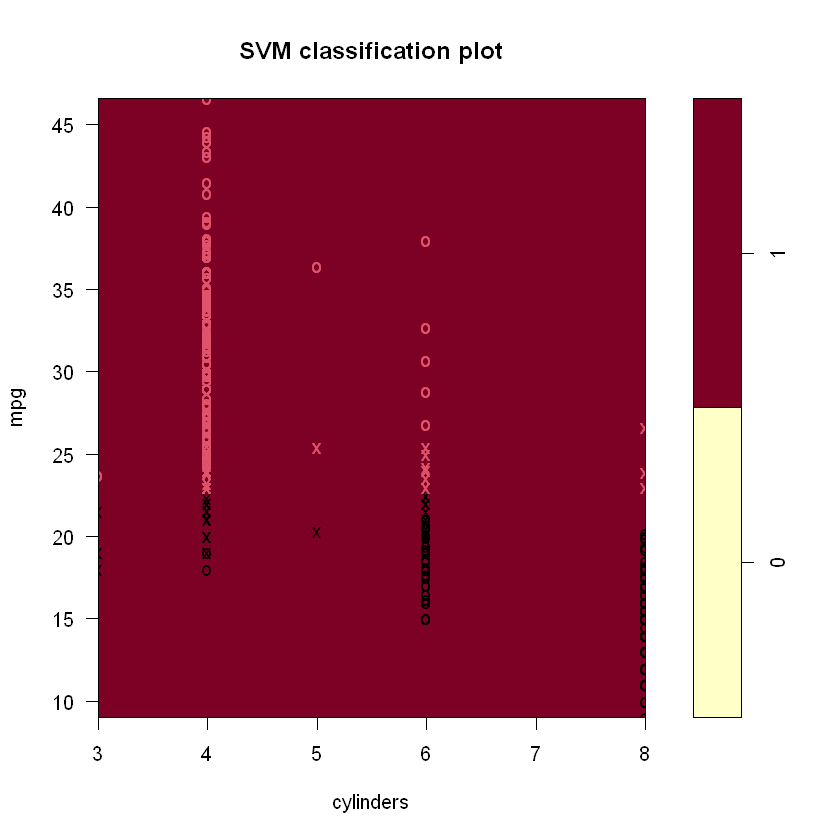

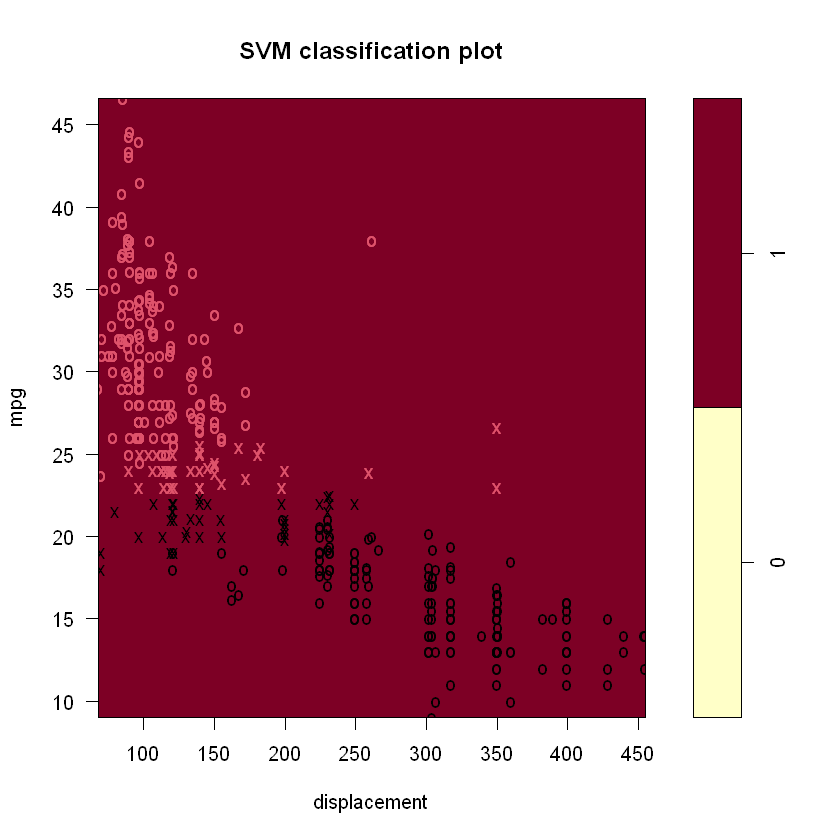

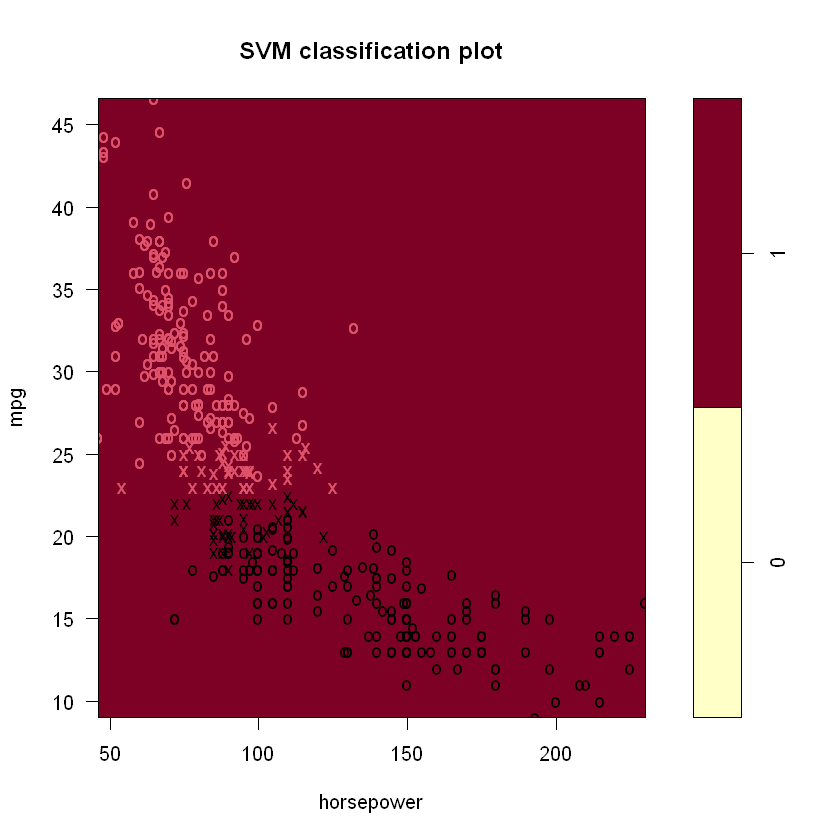

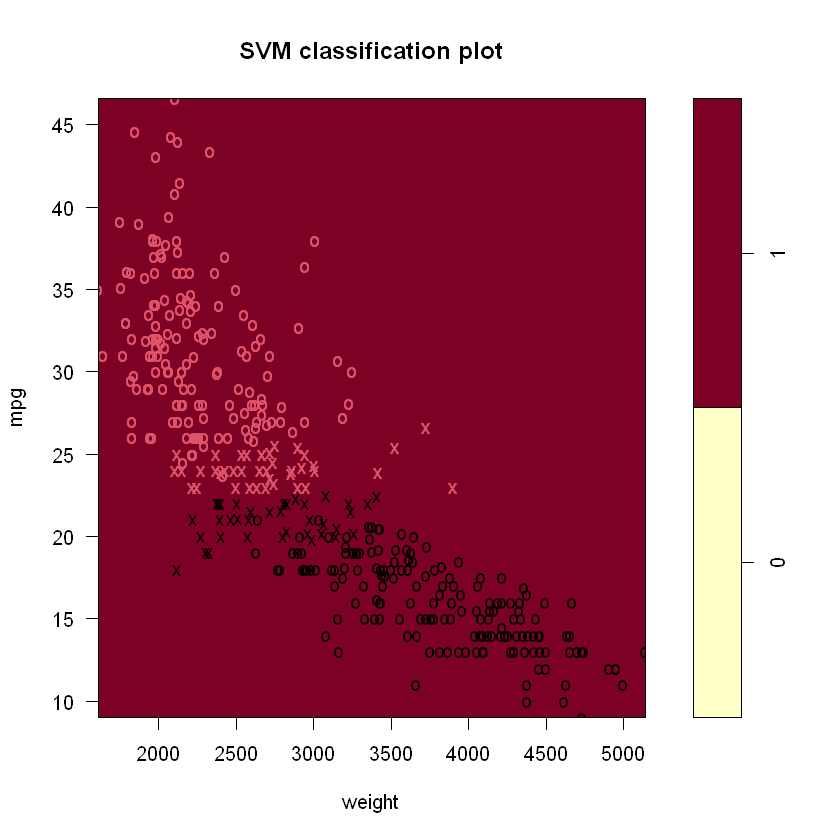

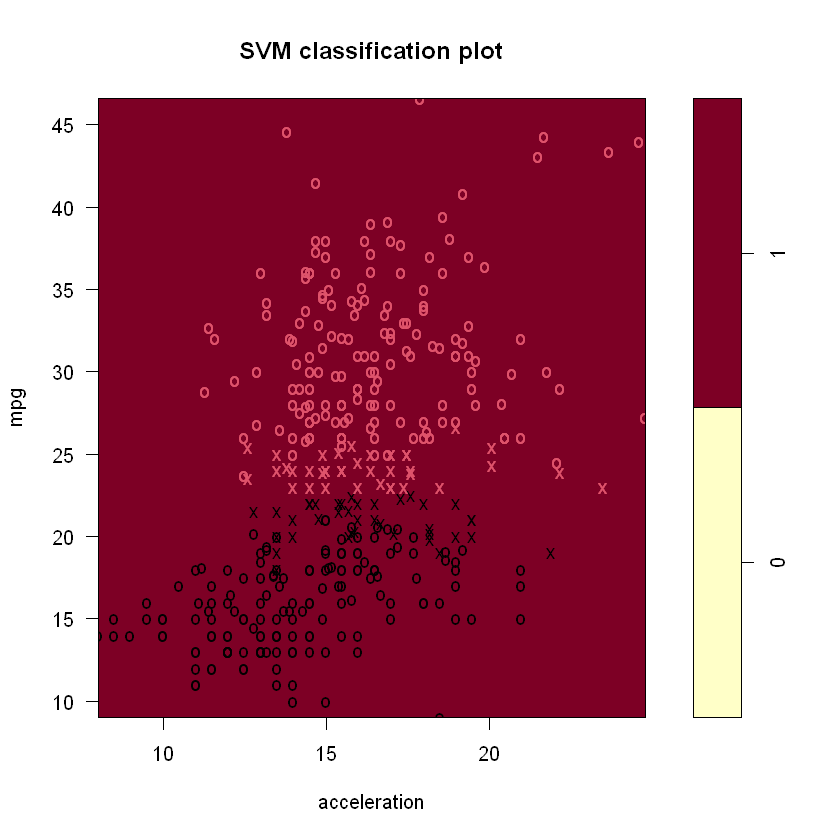

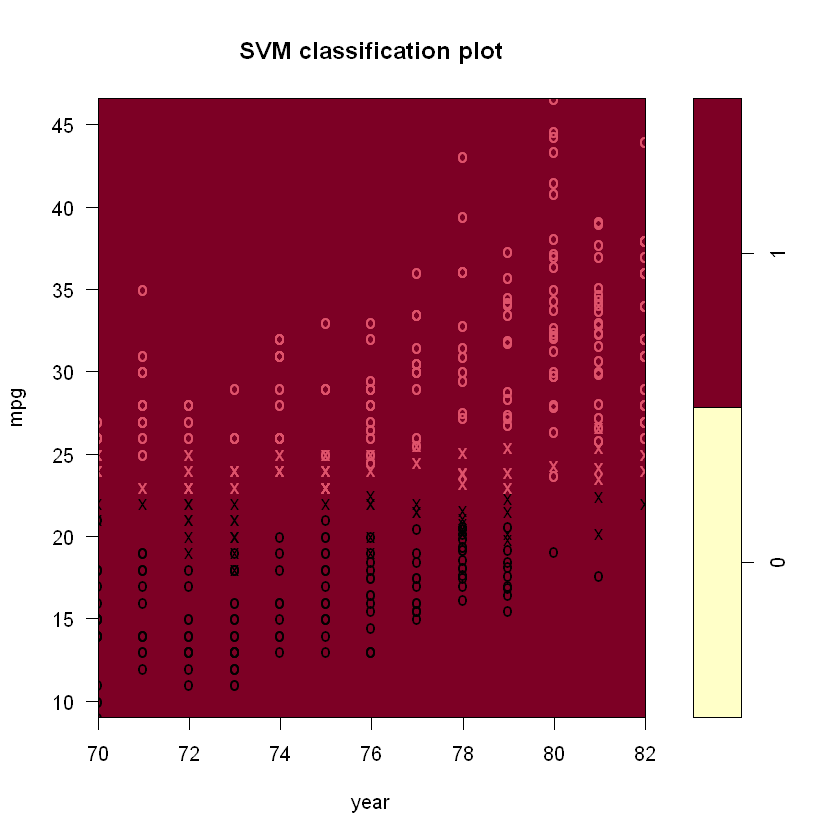

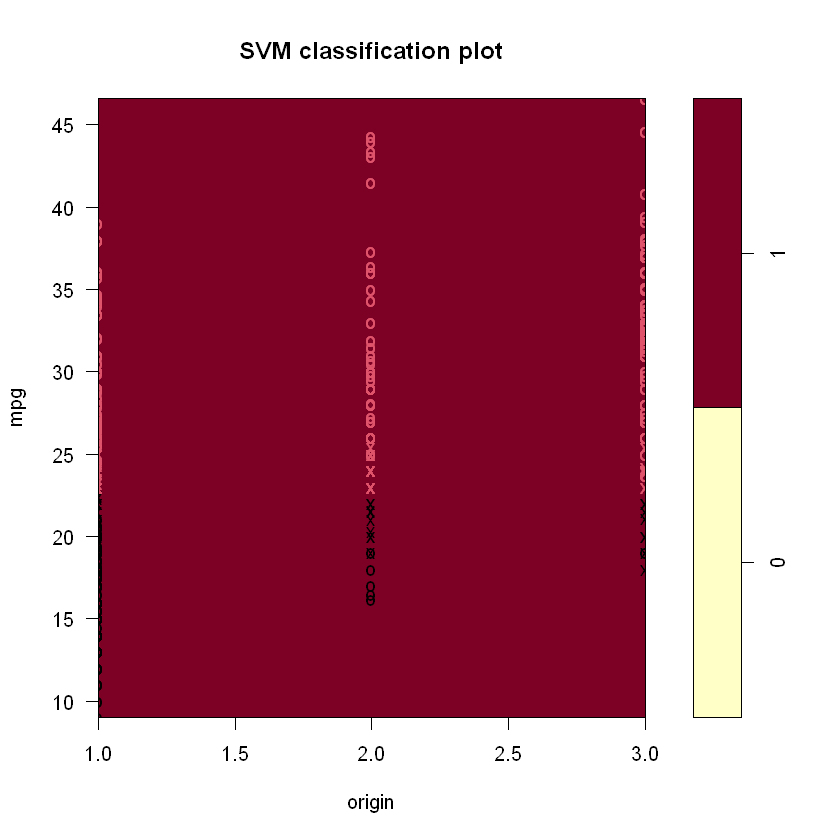

In [23]:
plotpairs(svm.radial)

In [24]:
# Question 8 A
library(ISLR)
set.seed(9004)
train = sample(dim(OJ)[1], 800)
OJ.train = OJ[train, ]
OJ.test = OJ[-train, ]

In [25]:
# B
svm.linear = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = 0.01)
summary(svm.linear)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  442

 ( 222 220 )


Number of Classes:  2 

Levels: 
 CH MM




In [26]:
# C
train.pred = predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 432  51
  MM  80 237

In [27]:
test.pred = predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 146  24
  MM  22  78

In [28]:
#D
set.seed(1554)
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "linear", ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 3.162278

- best performance: 0.1625 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.16750 0.03395258
2   0.01778279 0.16875 0.02960973
3   0.03162278 0.16625 0.02638523
4   0.05623413 0.16875 0.03076005
5   0.10000000 0.16875 0.02901748
6   0.17782794 0.16750 0.02838231
7   0.31622777 0.17000 0.02898755
8   0.56234133 0.16875 0.02841288
9   1.00000000 0.16500 0.03106892
10  1.77827941 0.16500 0.03106892
11  3.16227766 0.16250 0.03118048
12  5.62341325 0.16375 0.02664713
13 10.00000000 0.16750 0.02581989


In [29]:
#E
svm.linear = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = tune.out$best.parameters$cost)
train.pred = predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 428  55
  MM  74 243

In [30]:
test.pred = predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 146  24
  MM  20  80

In [31]:
#F
set.seed(410)
svm.radial = svm(Purchase ~ ., data = OJ.train, kernel = "radial")
summary(svm.radial)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  371

 ( 188 183 )


Number of Classes:  2 

Levels: 
 CH MM




In [32]:
train.pred = predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 441  42
  MM  74 243

In [33]:
test.pred = predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 146  24
  MM  20  80

In [34]:
# G

set.seed(8112)
svm.poly = svm(Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2)
summary(svm.poly)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  456

 ( 232 224 )


Number of Classes:  2 

Levels: 
 CH MM




In [35]:
train.pred = predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 450  33
  MM 111 206

In [36]:
test.pred = predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 149  21
  MM  34  66